## Dataset formation and preprocessing

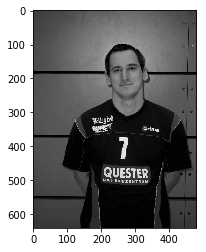

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline
DATADIR = "E:/humandataset"
CATEGORIES = ['human','not human']

for category in CATEGORIES:
    path  = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break
        
    

In [2]:
print(img_array.shape)

(640, 480)


### Making all images of same dims

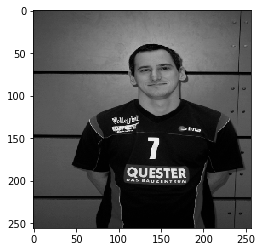

In [3]:
IMG_SIZE = 256
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [4]:
training_data = []

def create_training_data():
    
    for category in CATEGORIES:
        path  = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category) 
        for img in os.listdir(path):
            try:
                
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e: pass

create_training_data()
                
        

In [5]:
len(training_data)

677

### Balancing the dataset | Shuffling/ Randomizing 

In [6]:
import random

random.shuffle(training_data)

In [7]:
for sample in training_data:
    print(sample[1])

1
0
1
1
0
0
0
1
1
1
0
0
1
0
0
1
1
1
1
0
0
0
0
1
0
0
0
1
1
0
1
1
0
0
0
1
0
1
0
0
1
1
0
0
1
1
1
0
0
0
1
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
0
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
0
0
1
0
1
1
1
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
0
0
0
0
1
0
1
1
0
0
1
1
1
0
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
1
1
1
0
0
0
1
0
1
1
0
0
0
0
1
0
0
1
1
0
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
1
1
1
0
1
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
1
1
0
1
0
0
0
1
1
1
0
0
1
0
1
1
1
0
0
0
0
0
1
0
1
1
0
1
0
0
0
0
0
1
1
0
0
1
1
0
1
1
1
1
0
1
0
0
1
0
1
0
1
0
0
0
1
1
1
0
1
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
1
0
1
1
1
1
1
0
1
0
0
0
0
1
0
1
0
0
1
0
0
1
1
0
0
0
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
1
0
1
1
1
1
0
1
0
1
1
0
0
1
0
1
1
1
0
1
0
0
0
0
1
1
0
0
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
1
0
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0


In [8]:
X = []
y = []


In [9]:
for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)


In [10]:
import pickle

pickle_out = open("X.pickle" ,"wb")
pickle.dump(X,pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("X.pickle","rb")
X=pickle.load(pickle_in)

# Training the MLP for binary classification

In [12]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.optimizers import SGD
from keras.utils import np_utils


C:\Users\Mahe\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
(X_train,X_test) = (X[:542],X[542:])
(y_train,y_test) = (y[:542],y[542:])

In [14]:
#Normalizee
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [15]:
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(542, 2)
(135, 2)


In [16]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               33554944  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 33,818,626
Trainable params: 33,818,626
Non-trainable params: 0
________________________________________________________________

In [17]:
model.compile(loss='categorical_crossentropy',optimizer="rmsprop",metrics=['accuracy'])

In [18]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 433 samples, validate on 109 samples
Epoch 1/10
433/433 [==============================] - 8s 17ms/step - loss: 5.0206 - acc: 0.4873 - val_loss: 6.2106 - val_acc: 0.6147

Epoch 00001: val_loss improved from inf to 6.21064, saving model to mnist.model.best.hdf5
Epoch 2/10
433/433 [==============================] - 4s 10ms/step - loss: 5.8070 - acc: 0.6397 - val_loss: 6.2106 - val_acc: 0.6147

Epoch 00002: val_loss did not improve from 6.21064
Epoch 3/10
433/433 [==============================] - 4s 10ms/step - loss: 5.8070 - acc: 0.6397 - val_loss: 6.2106 - val_acc: 0.6147

Epoch 00003: val_loss did not improve from 6.21064
Epoch 4/10
433/433 [==============================] - 4s 10ms/step - loss: 5.8070 - acc: 0.6397 - val_loss: 6.2106 - val_acc: 0.6147

Epoch 00004: val_loss did not improve from 6.21064
Epoch 5/10
433/433 [==============================] - 4s 10ms/step - loss: 5.8070 - acc: 0.6397 - val_loss: 6.2106 - val_acc: 0.6147

Epoch 00005: val_loss did not improve fro

In [19]:
model.load_weights('mnist.model.best.hdf5')

In [20]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
score

[6.447238445281982, 0.6000000004415159]

In [21]:
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 60.0000%
